In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

Welcome to JupyROOT 6.26/04
The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


# MC15ri

# D+ -> (eta -> gg) pi+

In [ ]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/pre_cut_study/'
file += 'pre_cut_*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
# base_filter=' Dp_M>0'
base_filter= ' ((etapip_gamma1_clusterReg==1 && etapip_gamma1_E>0.05) || (etapip_gamma1_clusterReg==3 && etapip_gamma1_E>0.075) || (etapip_gamma1_clusterReg==2 && etapip_gamma1_E>0.05))'
base_filter += ' & ((etapip_gamma2_clusterReg==1 && etapip_gamma2_E>0.05) || (etapip_gamma2_clusterReg==3 && etapip_gamma2_E>0.075) || (etapip_gamma2_clusterReg==2 && etapip_gamma2_E>0.05))'
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_gamma1_p>0.1 && etapip_gamma2_p>0.1'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '
tree = 'etapip_gg'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dz',]
             #'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             #'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask']

Dp_gg   = get_pd(file=file , tree=tree, variables=variables ,base_filter=base_filter)
Dp_gg_true = Dp_gg.query('Dp_isSignal==1')
Dp_gg_false = Dp_gg.query('Dp_isSignal!=1')


runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "Dp_cosAngleBetweenMomentumAndVertexVector" is not in a dataset and is not a custom column been defined.

## D+M

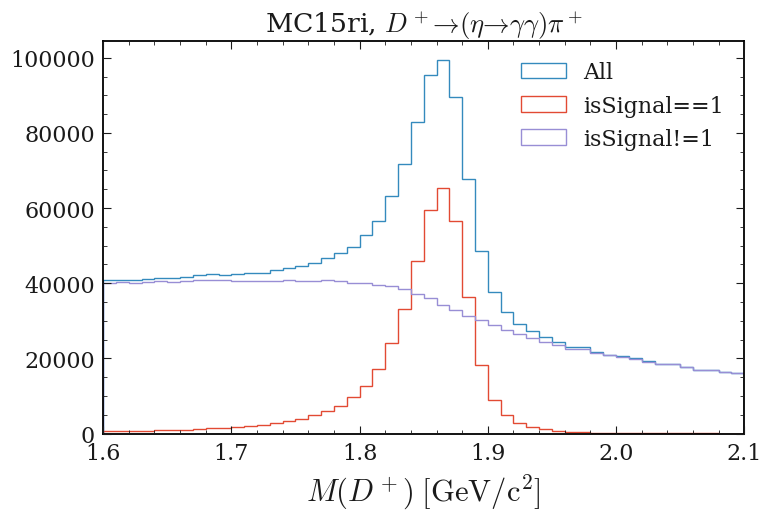

In [125]:
xrange = (1.60,2.1,51)
xm = np.linspace(*xrange)
var = 'Dp_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_DpM_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^+)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)



## p*(D+)

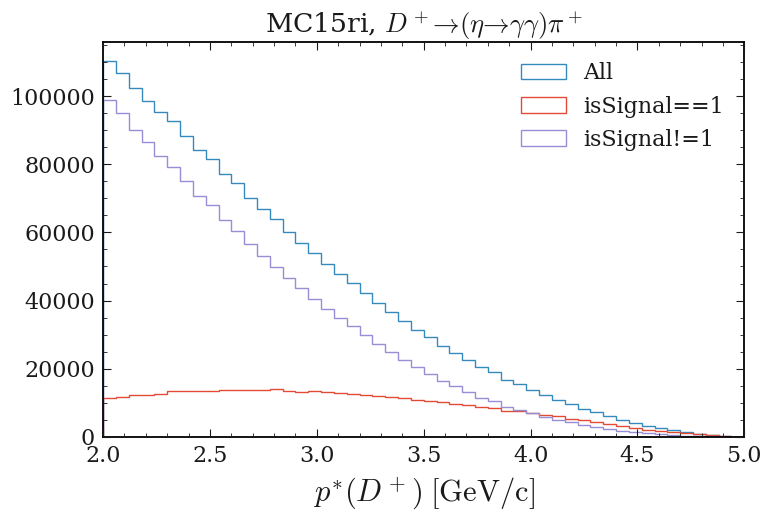

In [120]:
xrange = (2,5,51)
xm = np.linspace(*xrange)
var = 'Dp_CMS_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Dp_CMSp_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p^{*}(D^+)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



## Pip dr

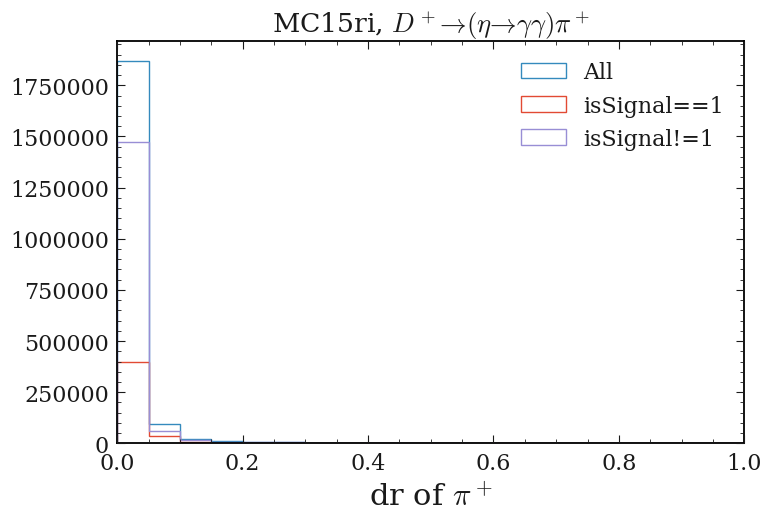

In [129]:
xrange = (0,1,21)
xm = np.linspace(*xrange)
var = 'Pip_dr'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Pip_dr_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'dr of $\pi^+$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

## Pip dz

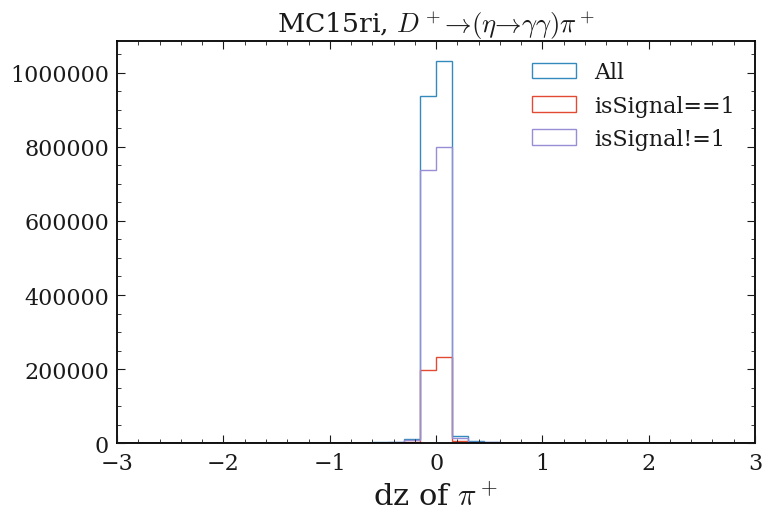

In [130]:
xrange = (-3,3,41)
xm = np.linspace(*xrange)
var = 'Pip_dz'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Pip_dz_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'dz of $\pi^+$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

## Eta_M

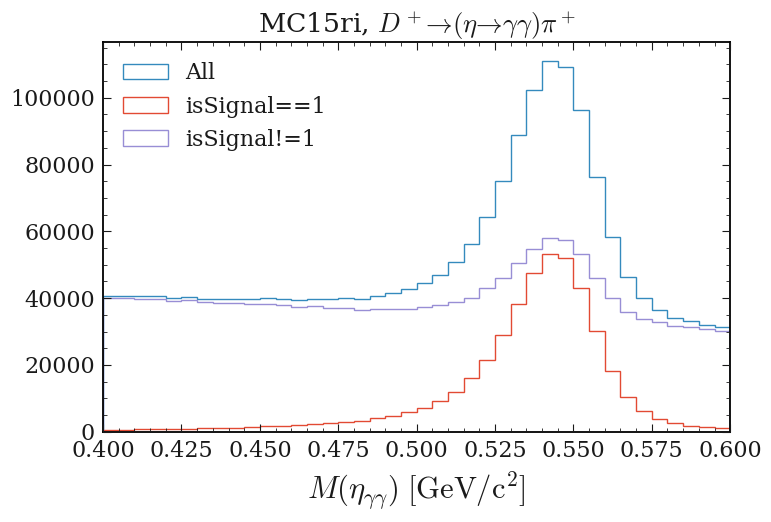

In [131]:
xrange = (0.4,0.6,41)
xm = np.linspace(*xrange)
var = 'etapip_Eta_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\eta_{\gamma\gamma})\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

## photon E for Eta_gg

In [109]:
# 'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
#              'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\

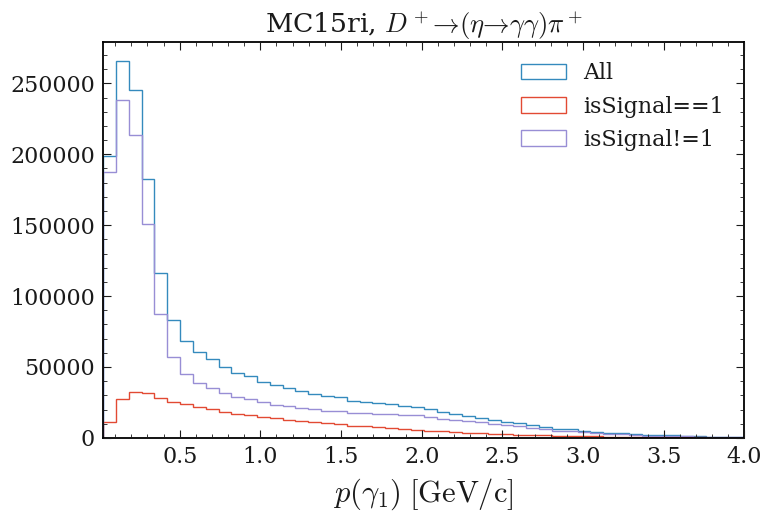

In [110]:
xrange = (0.025,4,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

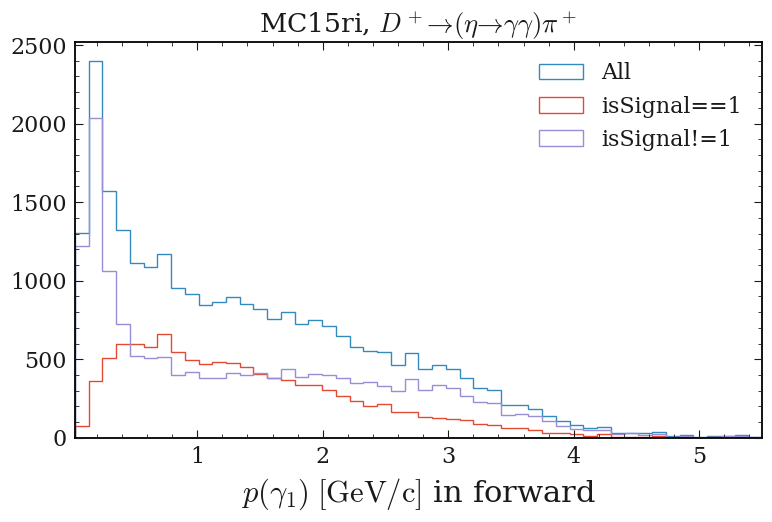

In [111]:
xrange = (0.025,5.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g1_p_clusterReg1_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==1')[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==1')[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==1')[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $ in forward'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

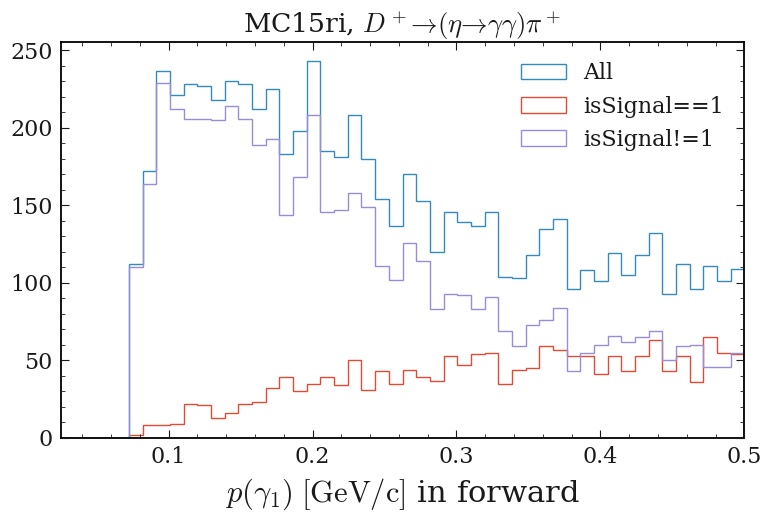

In [112]:
xrange = (0.025,0.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g1_p_clusterReg1_precut_study_zoom.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==1')[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==1')[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==1')[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $ in forward'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

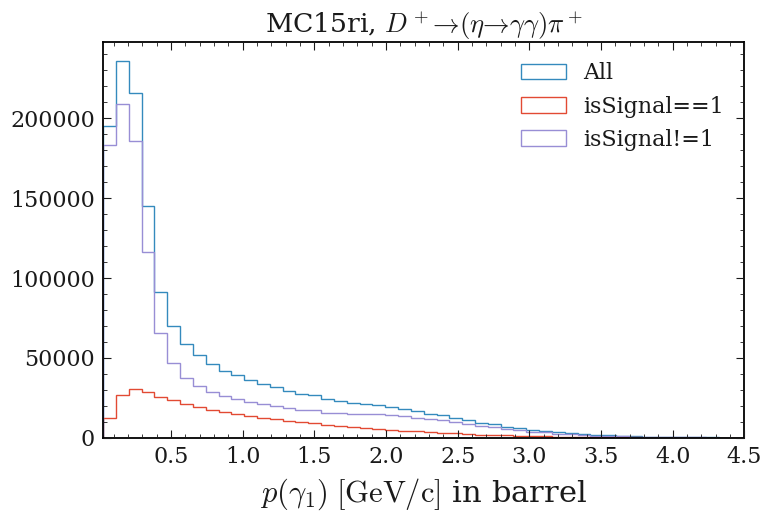

In [113]:
xrange = (0.025,4.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g1_p_clusterReg2_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==2')[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==2')[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==2')[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $ in barrel'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

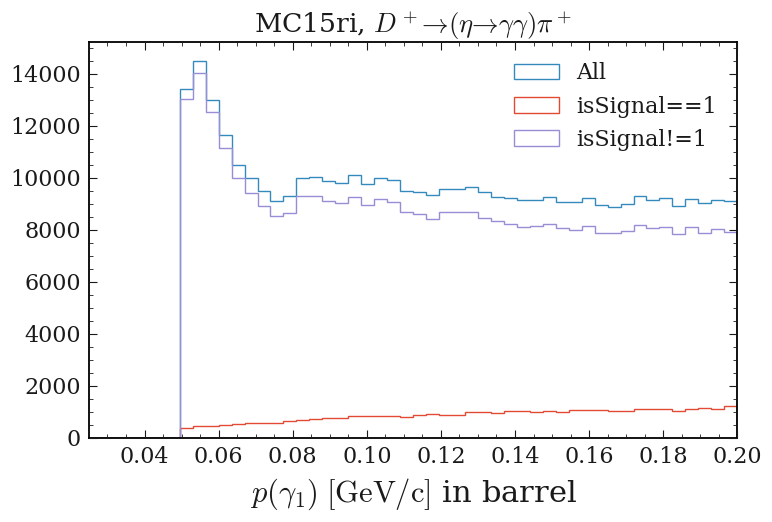

In [114]:
xrange = (0.025,0.2,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g1_p_clusterReg2_precut_study_zoom.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==2')[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==2')[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==2')[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $ in barrel'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

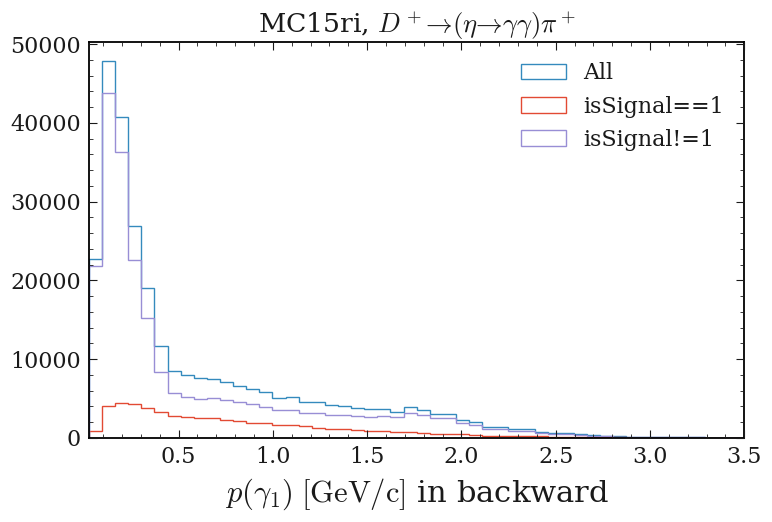

In [115]:
xrange = (0.025,3.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g1_p_clusterReg3_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==3')[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==3')[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==3')[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $ in backward'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

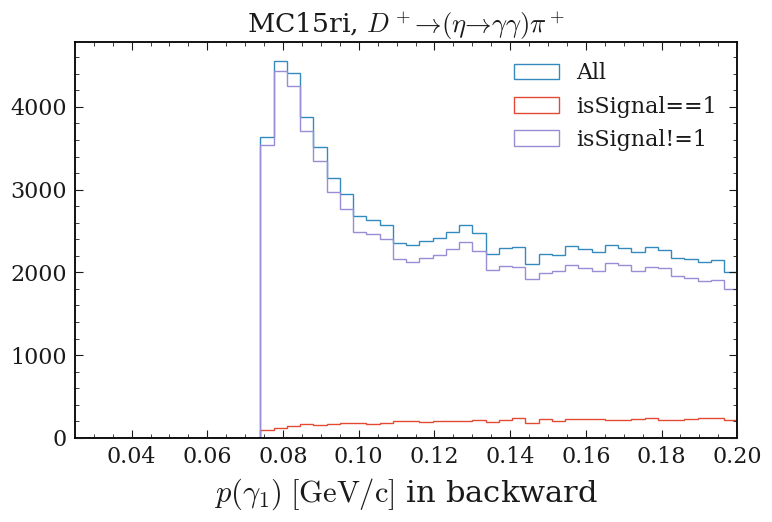

In [116]:
xrange = (0.025,0.2,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g1_p_clusterReg3_precut_study_zoom.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==3')[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==3')[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==3')[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $ in backward'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

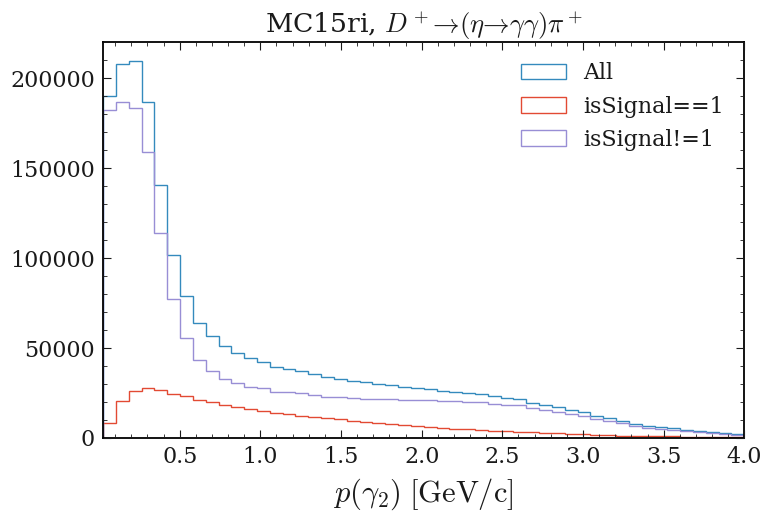

In [101]:
xrange = (0.025,4,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma2_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g2_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

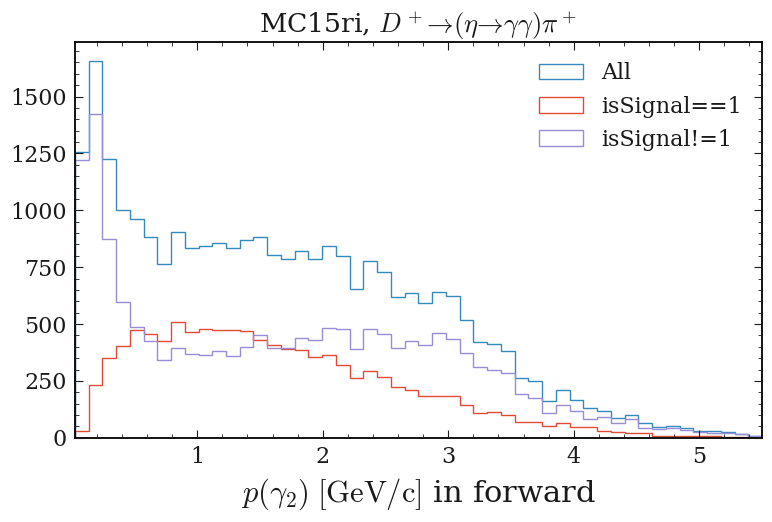

In [11]:
xrange = (0.025,5.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma2_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g2_p_clusterReg1_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==1')[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==1')[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==1')[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $ in forward'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

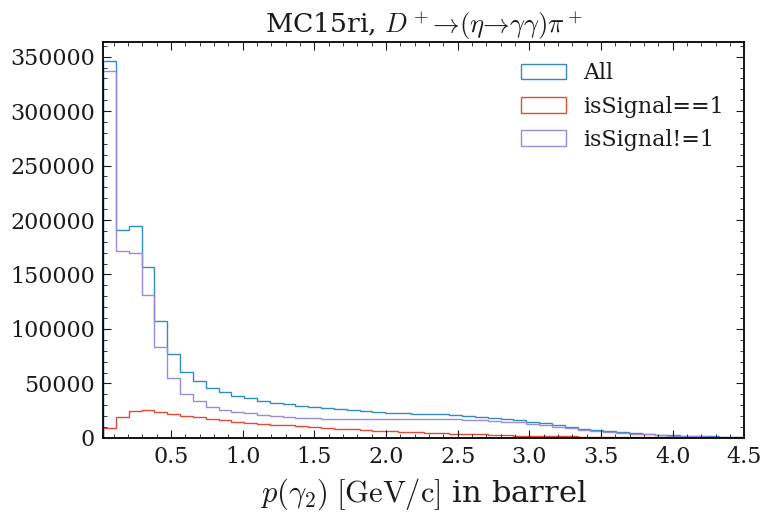

In [64]:
xrange = (0.025,4.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma2_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g2_p_clusterReg2_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==2')[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==2')[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==2')[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $ in barrel'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

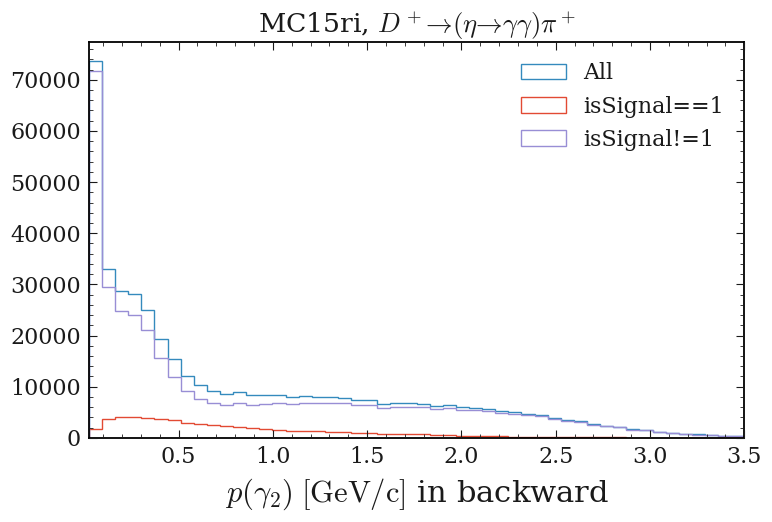

In [16]:
xrange = (0.025,3.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma2_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g2_p_clusterReg3_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==3')[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==3')[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==3')[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $ in backward'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

## photon E for Eta_gg normalized

In [50]:
# 'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
#              'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\

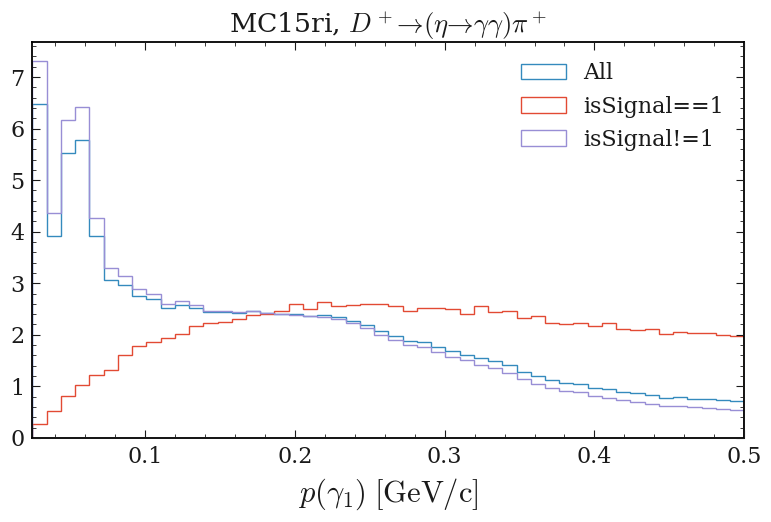

In [26]:
xrange = (0.025,0.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g1_p_precut_study_normalized_zoom.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

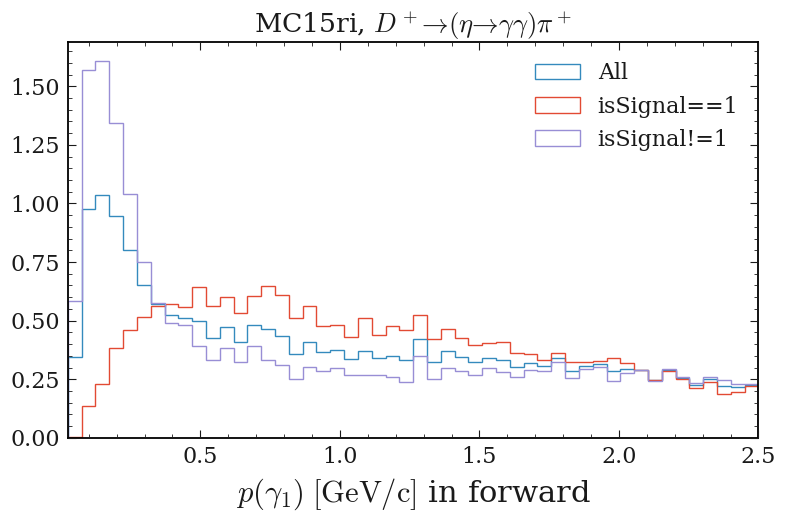

In [75]:
xrange = (0.025,2.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g1_p_clusterReg1_precut_study_normalized.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==1')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==1')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==1')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $ in forward'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

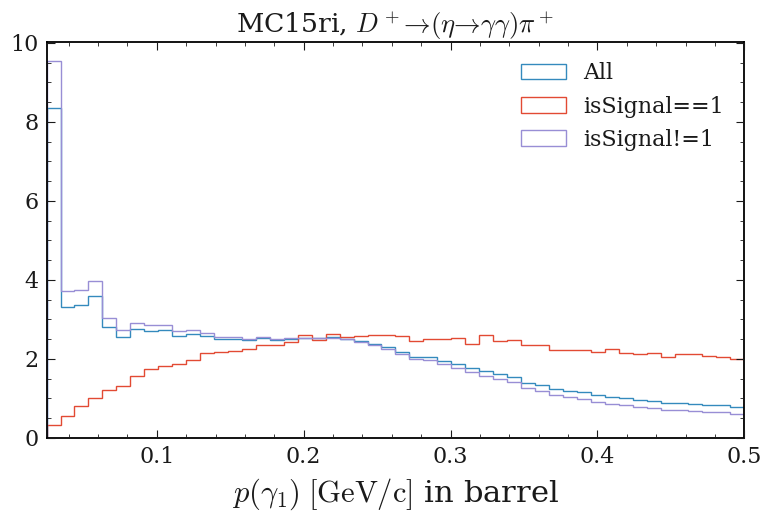

In [70]:
xrange = (0.025,0.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g1_p_clusterReg2_precut_study_normalized.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==2')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==2')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==2')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $ in barrel'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

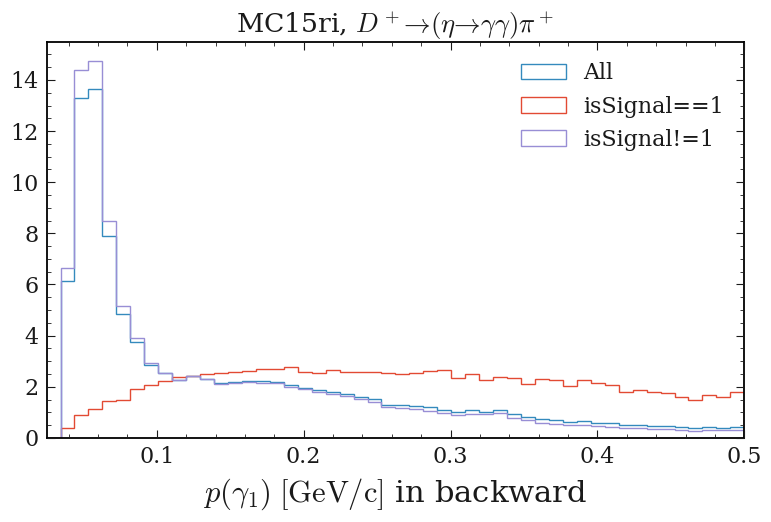

In [74]:
xrange = (0.025,0.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g1_p_clusterReg3_precut_study_normalized.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==3')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==3')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==3')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $ in backward'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

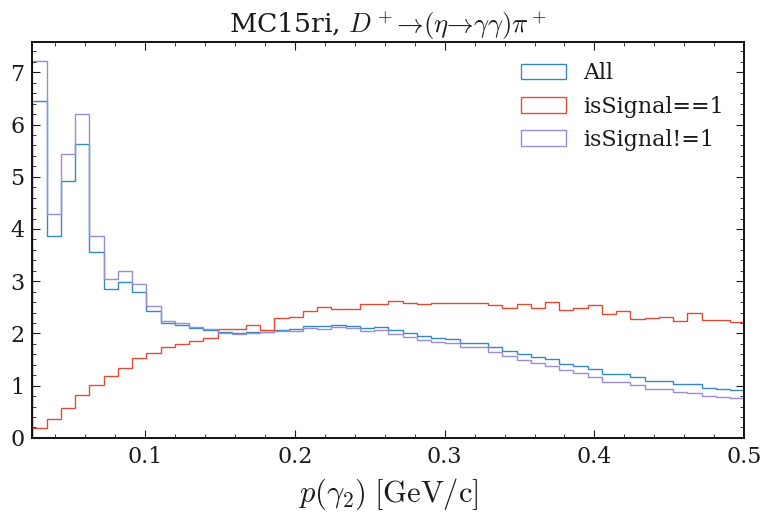

In [27]:
xrange = (0.025,0.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma2_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g2_p_precut_study_normalized_zoom.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

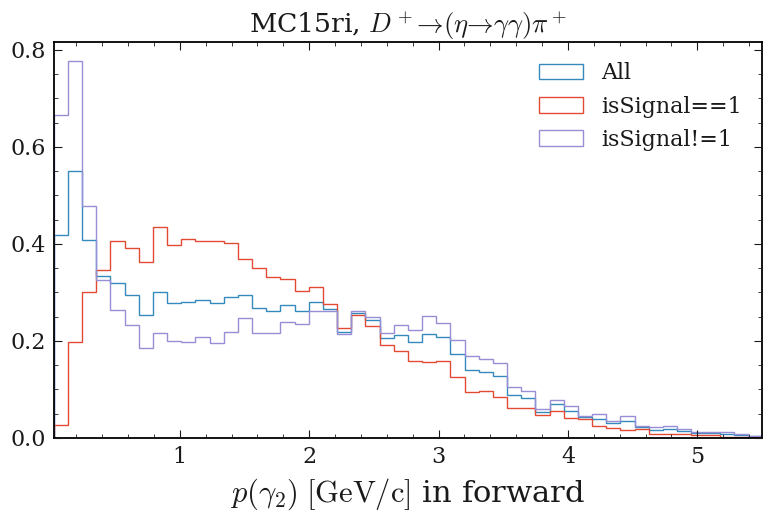

In [22]:
xrange = (0.025,5.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma2_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g2_p_clusterReg1_precut_study_normalized.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==1')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==1')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==1')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $ in forward'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

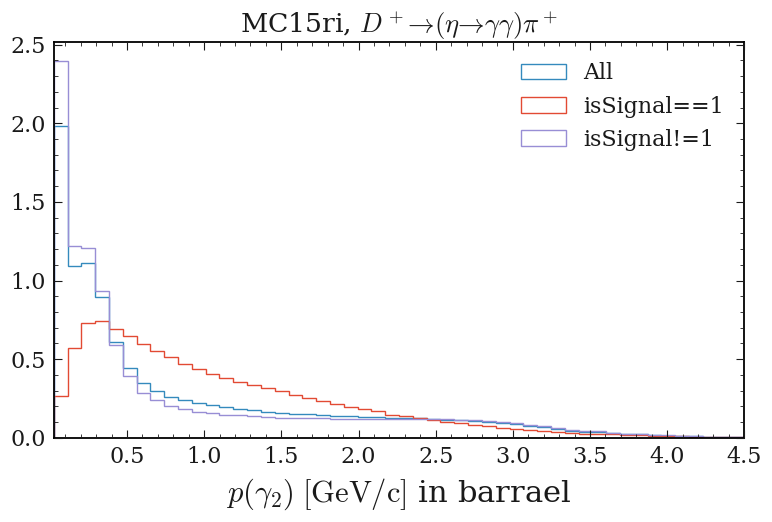

In [23]:
xrange = (0.025,4.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma2_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g2_p_clusterReg2_precut_study_normalized.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==2')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==2')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==2')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $ in barrael'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

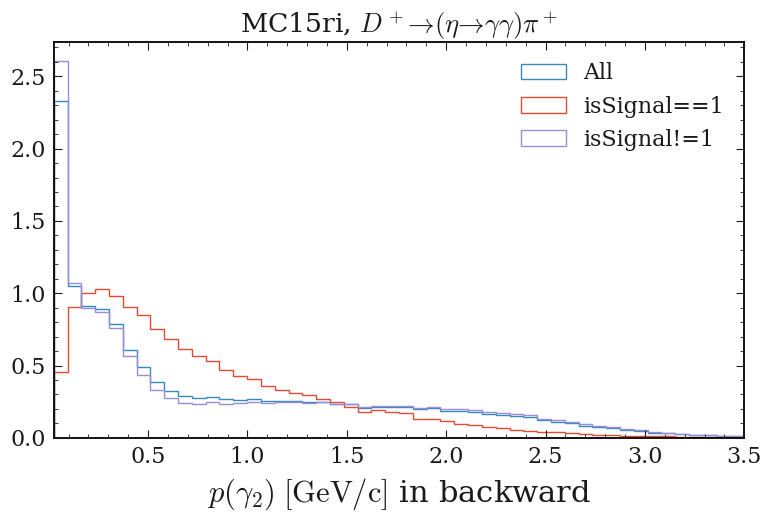

In [24]:
xrange = (0.025,3.5,51)
xm = np.linspace(*xrange)
var = 'etapip_gamma2_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Eta_g2_p_clusterReg3_precut_study_normalized.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg.query('etapip_gamma1_clusterReg==3')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_true.query('etapip_gamma1_clusterReg==3')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_gg_false.query('etapip_gamma1_clusterReg==3')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $ in backward'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

# plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
plt.savefig(file_path)

## Pip pid

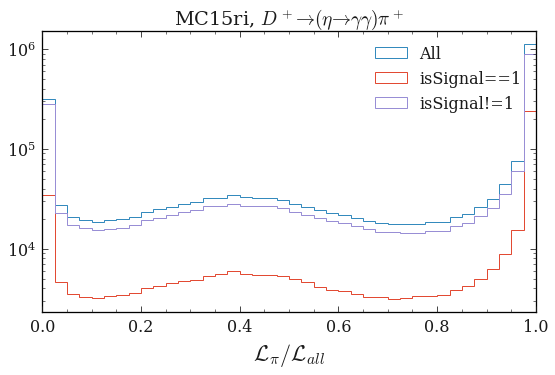

In [18]:
xrange = (0,1,41)
xm = np.linspace(*xrange)
var = 'Pip_pionID'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/Dpetapip_gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_D0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\mathcal{L}_{\pi}/\mathcal{L}_{all} $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
# plt.savefig(file_path)



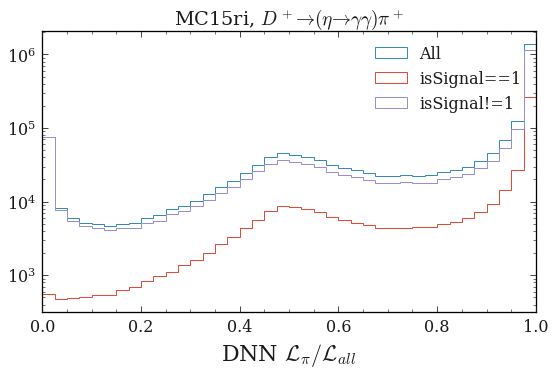

In [19]:
xrange = (0,1,41)
xm = np.linspace(*xrange)
var = 'Pip_pionIDNN'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/Dpetapip_gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_D0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'DNN $\mathcal{L}_{\pi}/\mathcal{L}_{all} $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.yscale('log')  # Setting the y-axis to logarithmic scale

plt.tight_layout()
# plt.savefig(file_path)



# D+ -> (eta -> pi+ pi- pi0) pi+

In [132]:
file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/pre_cut_study/'
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/pre_cut_study/'

file += 'pre_cut_*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter=' Dp_M>0'
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 &&  etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapipe_pi0_gamma1_p>0.1 && etapip_pi0_gamma2_p>0.1'

base_filter += ' && ((etapip_pi0_gamma1_clusterReg==1 && etapip_pi0_gamma1_E>0.05) || (etapip_pi0_gamma1_clusterReg==3 && etapip_pi0_gamma1_E>0.075) || (etapip_pi0_gamma1_clusterReg==2 && etapip_pi0_gamma1_E>0.05))'
base_filter += ' && ((etapip_pi0_gamma2_clusterReg==1 && etapip_pi0_gamma2_E>0.05) || (etapip_pi0_gamma2_clusterReg==3 && etapip_pi0_gamma2_E>0.075) || (etapip_pi0_gamma2_clusterReg==2 && etapip_pi0_gamma2_E>0.05))'


# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '
# base_filter+= ' && eta_Pi0'

tree = 'etapip_pipipi'
variables = ["__experiment__", "__run__", "__event__",\
             #'Dp_M','Dp_isSignal','Dp_CMS_p',\ #'Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane'\
             'Dp_M','Dp_isSignal','Dp_CMS_p',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits',\
             'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\
             'eta_Pi0_M',"eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1",\
             'eta_Pip_pionID','eta_Pim_pionID',\
             'eta_Pip_pionIDNN','eta_Pim_pionIDNN','eta_Pip_mcPDG','eta_Pim_mcPDG',\
             'Pip_pionID','Pip_pionID','Pip_mcPDG','Pip_dr','Pip_dr']

Dp_pipipi   = get_pd(file=file , tree=tree, variables=variables ,base_filter=base_filter)
Dp_pipipi_true = Dp_pipipi.query('Dp_isSignal==1')
Dp_pipipi_false = Dp_pipipi.query('Dp_isSignal!=1')


## D+M

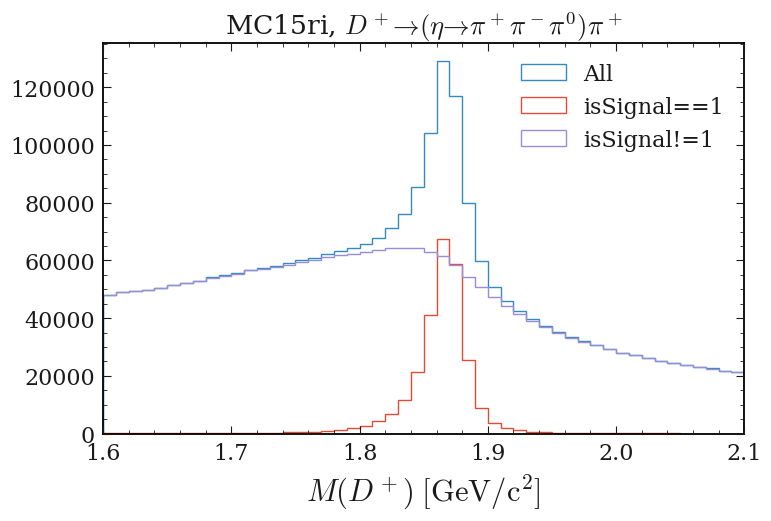

In [139]:
xrange = (1.60,2.1,51)
xm = np.linspace(*xrange)
var = 'Dp_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/Dpetapip_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_gg_1M_DpM_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^+)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)



## g1, g2 p

In [41]:
             # 'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits',\
             # 'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\

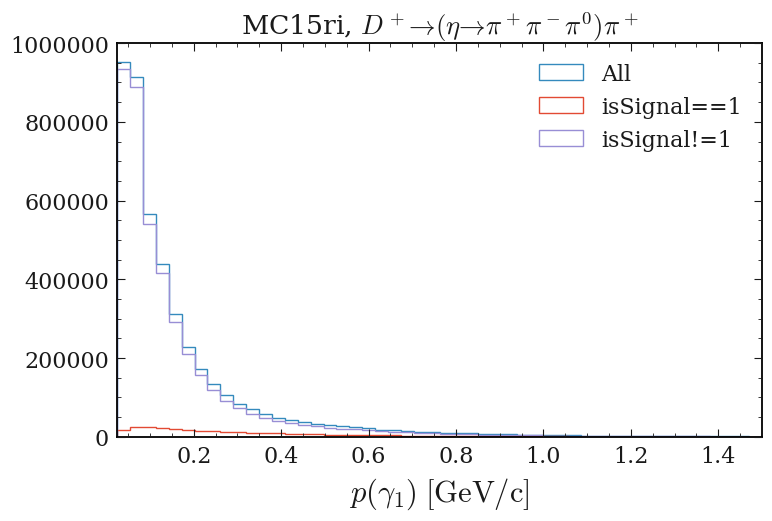

In [49]:
xrange = (0.025,1.5,51)
xm = np.linspace(*xrange)
var = 'etapip_pi0_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_g1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)

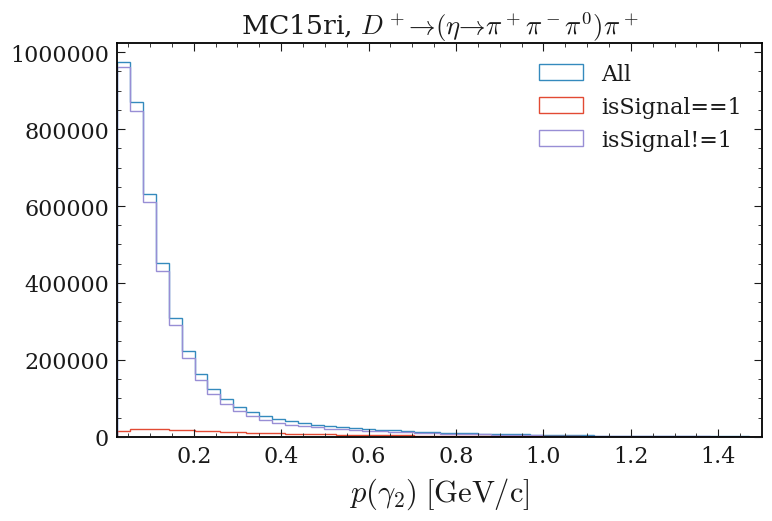

In [50]:
xrange = (0.025,1.5,51)
xm = np.linspace(*xrange)
var = 'etapip_pi0_gamma2_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_g2_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)

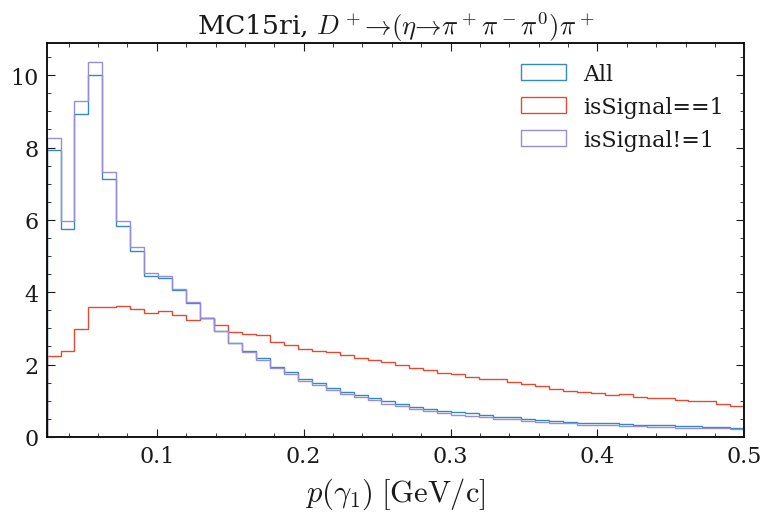

In [53]:
xrange = (0.025,0.5,51)
xm = np.linspace(*xrange)
var = 'etapip_pi0_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_g1_p_precut_study_normalized.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)

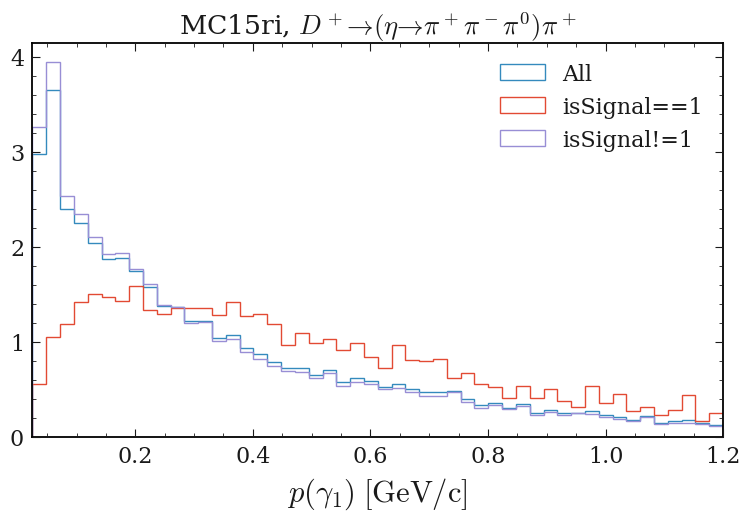

In [63]:
xrange = (0.025,1.2,51)
xm = np.linspace(*xrange)
var = 'etapip_pi0_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_g1_p_precut_study_normalized_forward.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi.query('etapip_pi0_gamma1_clusterReg==1')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_true.query('etapip_pi0_gamma1_clusterReg==1')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_false.query('etapip_pi0_gamma1_clusterReg==1')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)

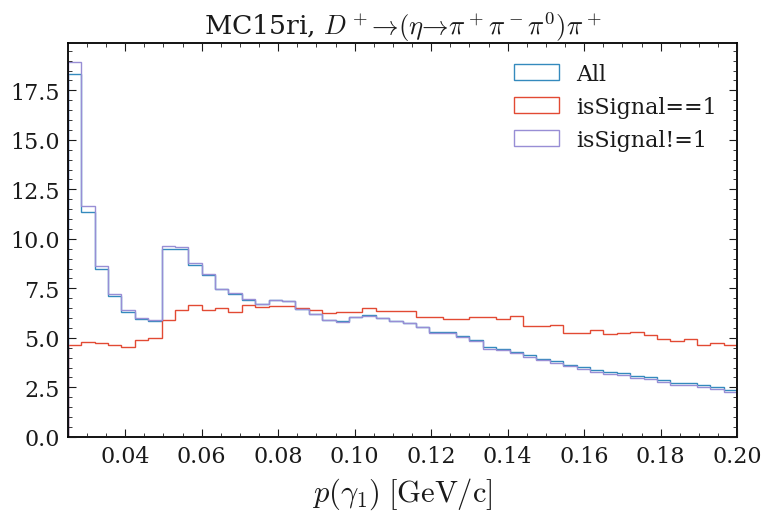

In [59]:
xrange = (0.025,0.2,51)
xm = np.linspace(*xrange)
var = 'etapip_pi0_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_g1_p_precut_study_normalized_barrael.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi.query('etapip_pi0_gamma1_clusterReg==2')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_true.query('etapip_pi0_gamma1_clusterReg==2')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_false.query('etapip_pi0_gamma1_clusterReg==2')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)

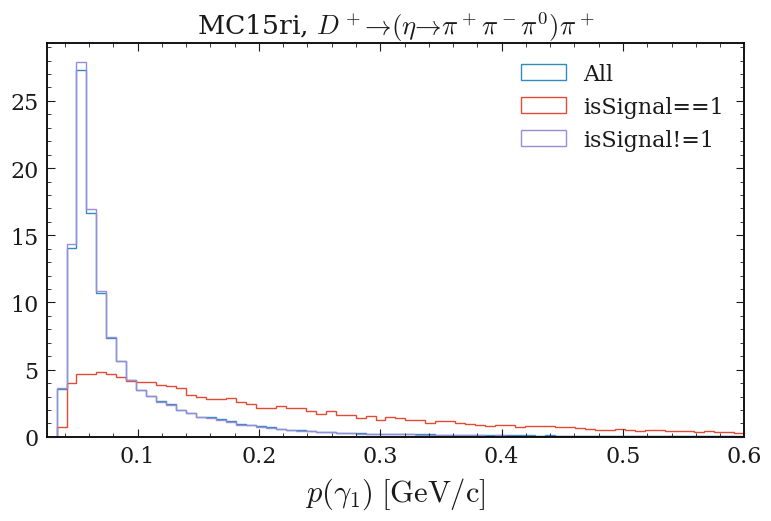

In [80]:
xrange = (0.025,0.6,71)
xm = np.linspace(*xrange)
var = 'etapip_pi0_gamma1_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_g1_p_precut_study_normalized_backward.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi.query('etapip_pi0_gamma1_clusterReg==3')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_true.query('etapip_pi0_gamma1_clusterReg==3')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_false.query('etapip_pi0_gamma1_clusterReg==3')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_1)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)

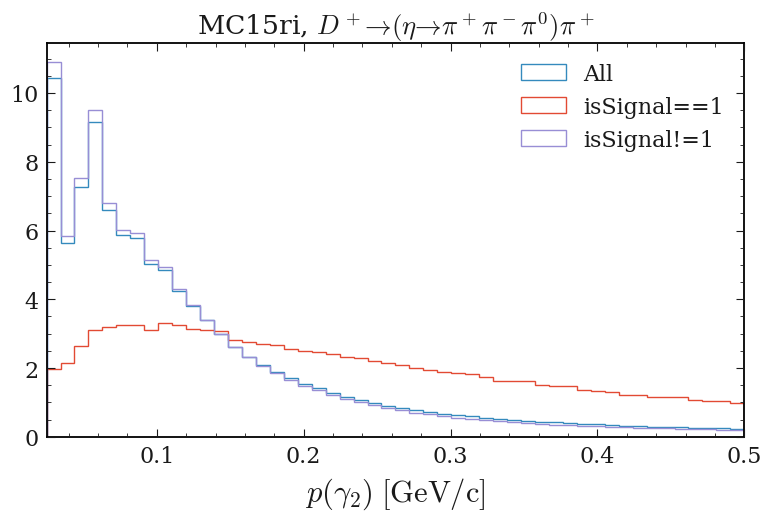

In [54]:
xrange = (0.025,0.5,51)
xm = np.linspace(*xrange)
var = 'etapip_pi0_gamma2_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_g2_p_precut_study_normalized.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)

## Pi0M

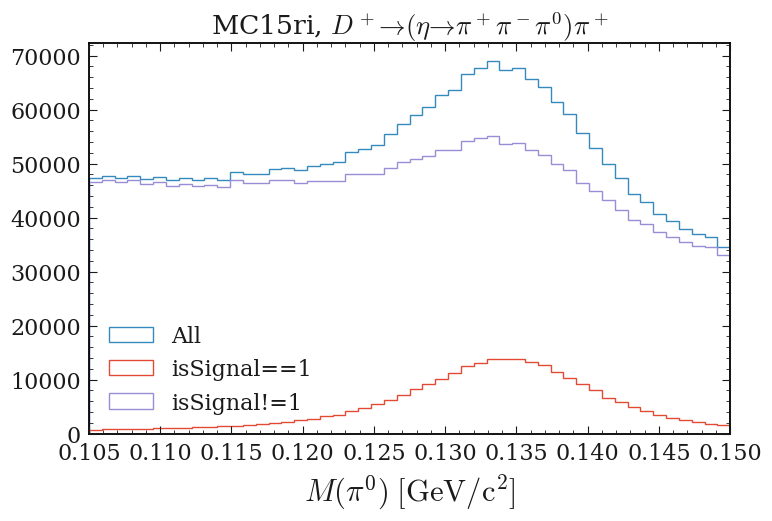

In [134]:
xrange = (0.105,0.150,51)
xm = np.linspace(*xrange)
var = 'eta_Pi0_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Pi0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\pi^0)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig(file_path)



## "eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1"

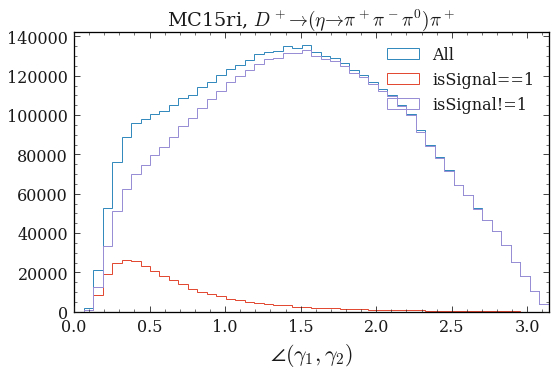

In [38]:
import math
xrange = (0,math.pi,51)
xm = np.linspace(*xrange)
var = 'eta_Pi0_daughterAngle_0_1'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Pi0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\angle(\gamma_1, \gamma_2)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



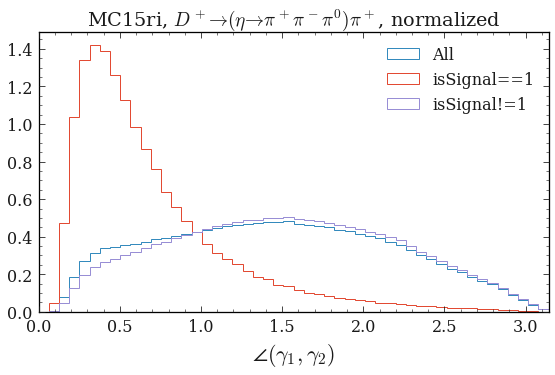

In [39]:
import math
xrange = (0,math.pi,51)
xm = np.linspace(*xrange)
var = 'eta_Pi0_daughterAngle_0_1'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$, normalized'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Pi0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\angle(\gamma_1, \gamma_2)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



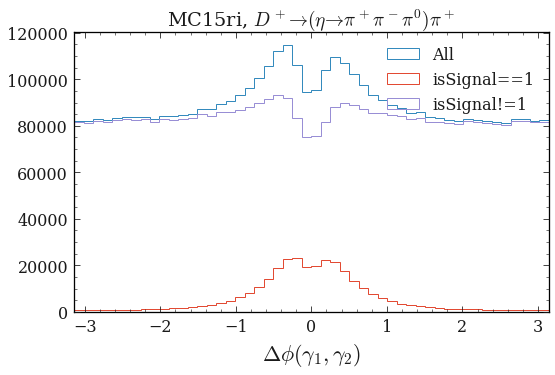

In [40]:
import math
xrange = (-math.pi,math.pi,51)
xm = np.linspace(*xrange)
var = 'eta_Pi0_daughterDiffOfPhi_0_1'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Pi0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\Delta \phi(\gamma_1, \gamma_2)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



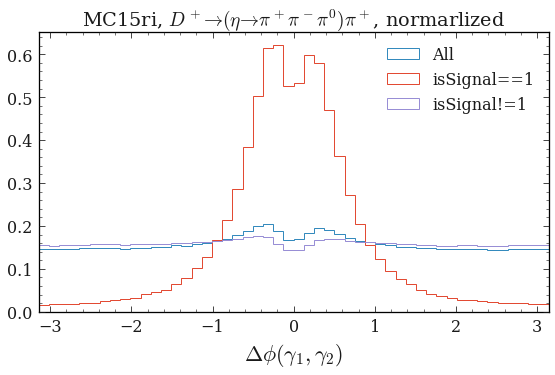

In [41]:
import math
xrange = (-math.pi,math.pi,51)
xm = np.linspace(*xrange)
var = 'eta_Pi0_daughterDiffOfPhi_0_1'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$, normarlized'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Pi0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\Delta \phi(\gamma_1, \gamma_2)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



## EtaM

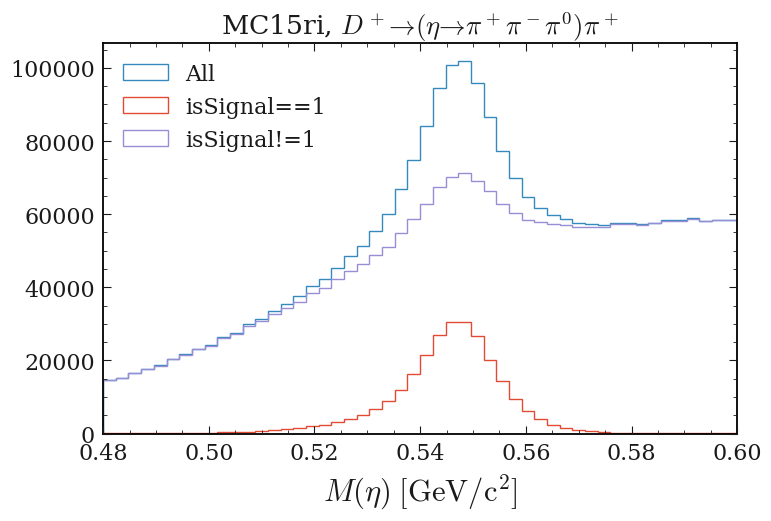

In [137]:
xrange = (0.48,0.6,51)
xm = np.linspace(*xrange)
var = 'etapip_Eta_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_EtaM_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\eta)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(file_path)



## Etap

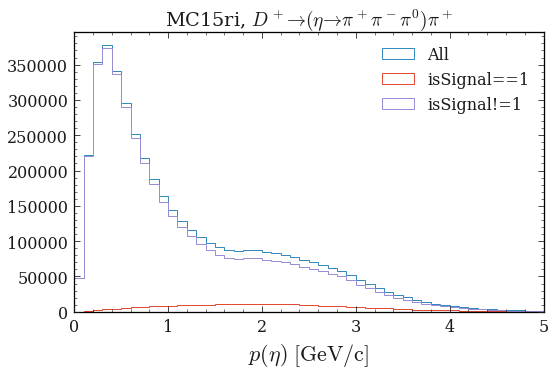

In [32]:
xrange = (0.,5,51)
xm = np.linspace(*xrange)
var = 'etapip_Eta_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Etap_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\eta)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



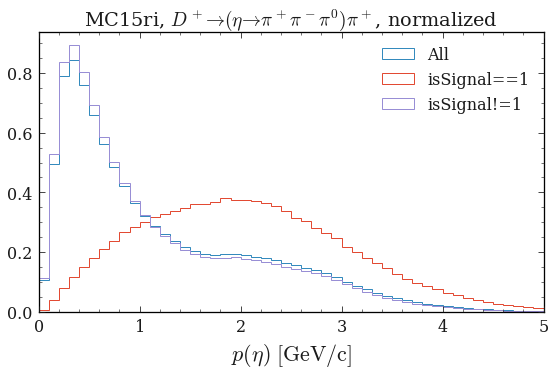

In [33]:
xrange = (0.,5,51)
xm = np.linspace(*xrange)
var = 'etapip_Eta_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$, normalized'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Etap_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\eta)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)